## References

- `plot_fourier.plot_fourier(source)` # WAVE ファイルを読み込む
    - `source` = 音声のファイルパス

- `make_wave.make_wave(frequency, time)` # 正弦波を生成し (*.wav) に書き込む
    - `frequency` = 周波数
    - `time` = 時間[s] / 初期値は 3 [s]

- `plot_fourier.calc_snrdb(original, recorded)`
    - `original` = 積分値(シグナルデータ)
    - `recorded` = 積分値(ノイズデータ)

In [1]:
import make_wave
import plot_fourier
import numpy as np

# Analysis

## 些音あり

In [ ]:
frequency_path = input('周波数パス')

[5.9293189e-08 4.5709303e-08 3.4880422e-08 ... 4.0053195e-08 3.4880422e-08
 4.5709303e-08]


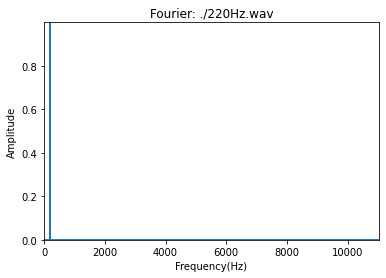

Amplitude Array : [5.9293189e-08 4.5709303e-08 3.4880422e-08 ... 4.0053195e-08 3.4880422e-08
 4.5709303e-08]
Amplitude Sum : 2.011634554520276
[5.7572724e-05 3.4760582e-05 4.4726687e-05 ... 3.2766795e-05 4.4726687e-05
 3.4760582e-05]


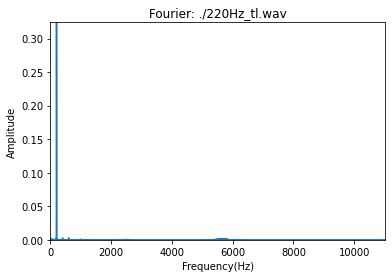

Amplitude Array : [5.7572724e-05 3.4760582e-05 4.4726687e-05 ... 3.2766795e-05 4.4726687e-05
 3.4760582e-05]
Amplitude Sum : 7.779506881988247
snr : 0.25858124236354585
snr[dB] : -5.8740298229193


In [2]:
tone = plot_fourier.plot_fourier('./' + str(frequency_path) + 'Hz.wav')
noisy = plot_fourier.plot_fourier('./' + str(frequency_path) + 'Hz_tl.wav')
plot_fourier.calc_snrdb(tone, noisy)

## 些音なし

[5.9293189e-08 4.5709303e-08 3.4880422e-08 ... 4.0053195e-08 3.4880422e-08
 4.5709303e-08]


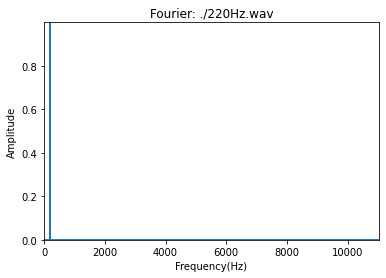

Amplitude Array : [5.9293189e-08 4.5709303e-08 3.4880422e-08 ... 4.0053195e-08 3.4880422e-08
 4.5709303e-08]
Amplitude Sum : 2.011634554520276
[1.2912919e-05 1.1843187e-05 1.7890778e-05 ... 2.0693999e-05 1.7890778e-05
 1.1843187e-05]


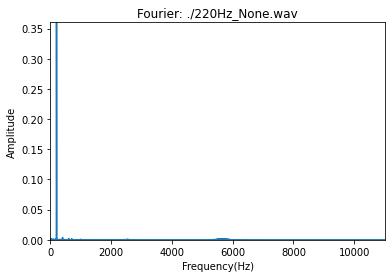

Amplitude Array : [1.2912919e-05 1.1843187e-05 1.7890778e-05 ... 2.0693999e-05 1.7890778e-05
 1.1843187e-05]
Amplitude Sum : 7.900338707095795
snr : 0.25462636845095
snr[dB] : -5.940966239354247


In [3]:
tone = plot_fourier.plot_fourier('./' + str(frequency_path) + 'Hz.wav')
noisy = plot_fourier.plot_fourier('./' + str(frequency_path) + 'Hz_None.wav')
plot_fourier.calc_snrdb(tone, noisy)